# Tasca 7 : Transformació Registre Log amb Regular expressions

## Ejercicio 1

Normaliza, identifica y enumera cada uno de los atributos/variables de la estructura del archivo "Web_access_log-akumenius.com" que encontrarás en el repositorio de GitHub "Data-sources". 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
from ip2geotools.databases.noncommercial import DbIpCity

In [4]:
logs_indescifrable = pd.read_csv('Web_access_log-akumenius.com.txt', sep='VLOG=-', header = None)
logs_indescifrable

<ipython-input-4-502140d7c163>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  logs_indescifrable = pd.read_csv('Web_access_log-akumenius.com.txt', sep='VLOG=-', header = None)


,0,1
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,NaN
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,NaN
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,NaN
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,NaN
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,NaN
...,...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...,NaN
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...,NaN
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,NaN
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,NaN


In [5]:
logs_indescifrable.isna().sum()

0         0
1    261873
dtype: int64

In [6]:
logs_indescifrable.drop(1, axis = 1, inplace = True)
logs_indescifrable

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...


In [7]:
logs_indescifrable.columns = ['Todo']
logs_indescifrable

,Todo
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...


In [8]:
logs_indescifrable['sitio_web'] = logs_indescifrable['Todo'].str.extract(r'(^\S*)')
logs_indescifrable

,Todo,sitio_web
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost
...,...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...,www.akumenius.com
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...,www.akumenius.com
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost


In [9]:
logs_indescifrable['IP'] = logs_indescifrable['Todo']
logs_indescifrable['IP'] = logs_indescifrable['Todo'].str.extract(r'(((\d*)([.])){3}(\d*))')
logs_indescifrable

,Todo,sitio_web,IP
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
...,...,...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...,www.akumenius.com,5.255.253.53
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...,www.akumenius.com,74.86.158.107
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1


In [10]:
logs_indescifrable['time'] = logs_indescifrable['Todo']
logs_indescifrable['time'] = logs_indescifrable['Todo'].str.extract(r'((\d{2})([/])(\w{3})([/])(\d{4})(([:])(\d{2})){3})')
logs_indescifrable

,Todo,sitio_web,IP,time
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31
...,...,...,...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1,02/Mar/2014:03:10:18
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1,02/Mar/2014:03:10:18


In [11]:
logs_indescifrable['time_zone'] = logs_indescifrable['Todo']
logs_indescifrable['time_zone'] = logs_indescifrable['Todo'].str.extract(r'([+](\d*))')
logs_indescifrable['time_zone'].unique()

array(['+0100'], dtype=object)

Siempre es GMT + 1, por lo que se podría eliminar.

In [12]:
logs_indescifrable['method'] = logs_indescifrable['Todo']
logs_indescifrable['method'] = logs_indescifrable['Todo'].str.extract(r'((")([A-Z]+)( ))')
logs_indescifrable

,Todo,sitio_web,IP,time,time_zone,method
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS"
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS"
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS"
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS"
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS"
...,...,...,...,...,...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39,+0100,"""GET"
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52,+0100,"""HEAD"
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1,02/Mar/2014:03:10:18,+0100,"""OPTIONS"
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1,02/Mar/2014:03:10:18,+0100,"""OPTIONS"


In [13]:
logs_indescifrable['resource'] = logs_indescifrable['Todo']
logs_indescifrable['resource'] = logs_indescifrable['Todo'].str.extract(r'((\s)(/)(\S+)(\s))')
logs_indescifrable.head(30)

,Todo,sitio_web,IP,time,time_zone,method,resource
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN
5,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN
6,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN
7,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN
8,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN
9,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN


In [14]:
logs_indescifrable['protocol'] = logs_indescifrable['Todo']
logs_indescifrable['protocol'] = logs_indescifrable['Todo'].str.extract(r'(([A-Z]+)(/)(\d)(.)(\d))')
logs_indescifrable.head(30)

,Todo,sitio_web,IP,time,time_zone,method,resource,protocol
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0
5,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0
6,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0
7,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0
8,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0
9,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0


In [15]:
logs_indescifrable['status'] = logs_indescifrable['Todo']
logs_indescifrable['status'] = logs_indescifrable['Todo'].str.extract(r'((\s)(\d{3})(\s))')
logs_indescifrable.head(30)

,Todo,sitio_web,IP,time,time_zone,method,resource,protocol,status
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200
5,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200
6,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200
7,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200
8,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200
9,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200


In [16]:
logs_indescifrable['size'] = logs_indescifrable['Todo']
logs_indescifrable['size'] = logs_indescifrable['Todo'].str.extract(r'((\s)(\d{4})(\s))')
logs_indescifrable.head(30)

,Todo,sitio_web,IP,time,time_zone,method,resource,protocol,status,size
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN
5,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN
6,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN
7,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN
8,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN
9,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN


In [17]:
logs_indescifrable['user-agent'] = logs_indescifrable['Todo']
logs_indescifrable['user-agent'] = logs_indescifrable['Todo'].str.extract(r'("[^"]*"\s)$')
logs_indescifrable.head(30)


,Todo,sitio_web,IP,time,time_zone,method,resource,protocol,status,size,user-agent
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
5,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
6,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
7,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
8,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
9,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31,+0100,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""


In [18]:
logs_norm = logs_indescifrable
logs_norm.to_csv('logs_normalizado.csv')

## Ejercicio 1

Limpia, procesa, estructura y transforma los datos del DF

El primer paso para limpiar los datos será eliminar las columnas que no queremos, como 'Todo' y 'time_zone'

In [19]:
logs_norm.drop(columns = ['Todo','time_zone'], inplace = True)
logs_norm

,sitio_web,IP,time,method,resource,protocol,status,size,user-agent
0,localhost,127.0.0.1,23/Feb/2014:03:10:31,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,23/Feb/2014:03:10:31,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,23/Feb/2014:03:10:31,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,23/Feb/2014:03:10:31,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,23/Feb/2014:03:10:31,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39,"""GET",NaN,HTTP/1.1,200,7528,"""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
261869,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52,"""HEAD",NaN,HTTP/1.1,200,NaN,"""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt..."
261870,localhost,127.0.0.1,02/Mar/2014:03:10:18,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""
261871,localhost,127.0.0.1,02/Mar/2014:03:10:18,"""OPTIONS",NaN,HTTP/1.0,200,NaN,"""Apache (internal dummy connection)"""


In [20]:
logs_norm['method'] = logs_norm['method'].str.extract('([A-Z]+)')
logs_norm['user-agent'] = logs_norm['user-agent'].str.extract('([^"]+)')
logs_norm

,sitio_web,IP,time,method,resource,protocol,status,size,user-agent
0,localhost,127.0.0.1,23/Feb/2014:03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
1,localhost,127.0.0.1,23/Feb/2014:03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
2,localhost,127.0.0.1,23/Feb/2014:03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
3,localhost,127.0.0.1,23/Feb/2014:03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
4,localhost,127.0.0.1,23/Feb/2014:03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39,GET,NaN,HTTP/1.1,200,7528,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52,HEAD,NaN,HTTP/1.1,200,NaN,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,localhost,127.0.0.1,02/Mar/2014:03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
261871,localhost,127.0.0.1,02/Mar/2014:03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)


In [21]:
logs_norm['time'] = pd.to_datetime(logs_norm['time'], format = '%d/%b/%Y:%H:%M:%S')
logs_norm

,sitio_web,IP,time,method,resource,protocol,status,size,user-agent
0,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
1,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
2,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
3,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
4,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39,GET,NaN,HTTP/1.1,200,7528,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52,HEAD,NaN,HTTP/1.1,200,NaN,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,localhost,127.0.0.1,2014-03-02 03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
261871,localhost,127.0.0.1,2014-03-02 03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)


### Exploración de los datos y columnas

In [22]:
logs_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   sitio_web   261873 non-null  object        
 1   IP          261873 non-null  object        
 2   time        261873 non-null  datetime64[ns]
 3   method      261831 non-null  object        
 4   resource    243881 non-null  object        
 5   protocol    261831 non-null  object        
 6   status      261873 non-null  object        
 7   size        128044 non-null  object        
 8   user-agent  261873 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 18.0+ MB


In [23]:
logs_norm.isna().sum()

sitio_web          0
IP                 0
time               0
method            42
resource       17992
protocol          42
status             0
size          133829
user-agent         0
dtype: int64

In [24]:
logs_norm['sitio_web'].unique()

array(['localhost', 'www.akumenius.com', 'akumenius.com', 'akumenius.es',
       'test.akumenius.com'], dtype=object)

(array([1.4127e+04, 0.0000e+00, 2.3230e+05, 0.0000e+00, 0.0000e+00,
        7.4200e+02, 0.0000e+00, 9.4000e+01, 0.0000e+00, 1.4610e+04]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

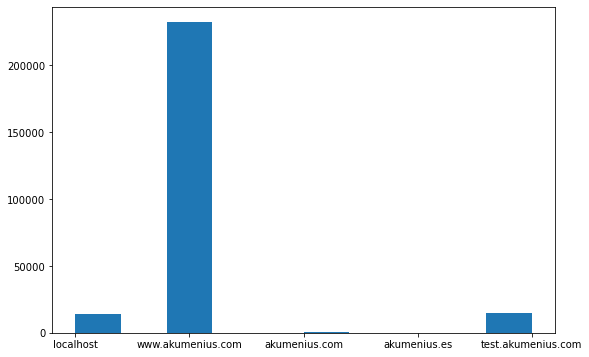

In [25]:
plt.figure(figsize = (9,6))
plt.hist(logs_norm['sitio_web'])

In [26]:
logs_norm['IP'].nunique()

2921

In [27]:
logs_norm['method'].unique()

array(['OPTIONS', 'GET', 'HEAD', 'POST', nan], dtype=object)

(array([ 13892.,      0.,      0., 229482.,      0.,      0.,   1788.,
             0.,      0.,  16669.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

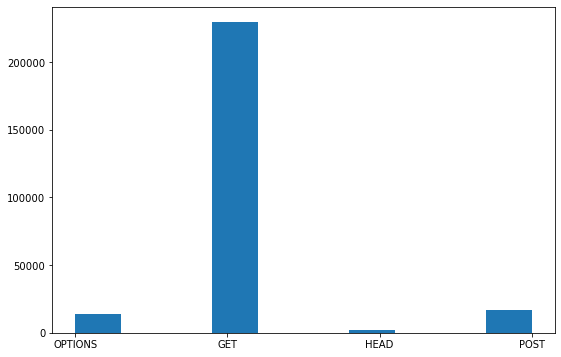

In [28]:
plt.figure(figsize = (9,6))

plt.hist(logs_norm['method'].dropna())

In [29]:
logs_norm['resource'].nunique()

66080

In [30]:
logs_norm['protocol'].unique()

array(['HTTP/1.0', 'HTTP/1.1', nan], dtype=object)

(array([ 19840.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 241991.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

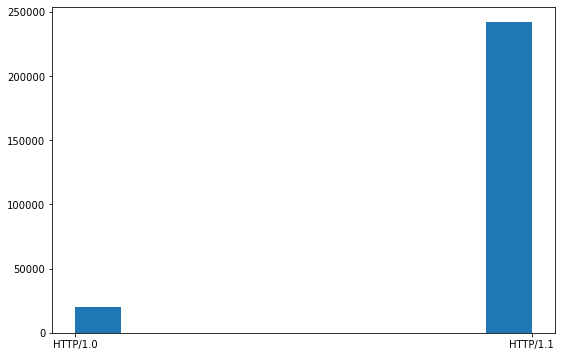

In [31]:
plt.figure(figsize = (9,6))

plt.hist(logs_norm['protocol'].dropna())

In [32]:
logs_norm['status'].unique()

array([' 200 ', ' 404 ', ' 304 ', ' 502 ', ' 301 ', ' 403 ', ' 408 ',
       ' 400 ', ' 206 ', ' 401 ', ' 302 ', ' 500 '], dtype=object)

(array([2.26382e+05, 8.63000e+03, 2.52690e+04, 4.40000e+01, 8.70000e+02,
        1.94000e+02, 3.70000e+01, 2.60000e+01, 3.04000e+02, 5.00000e+00,
        1.09000e+02, 3.00000e+00]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

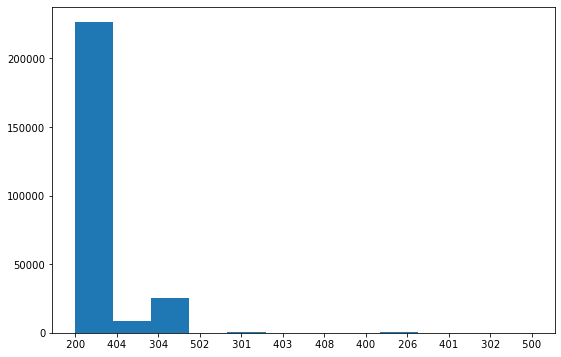

In [33]:
plt.figure(figsize = (9,6))

plt.hist(logs_norm['status'], bins = logs_norm['status'].nunique())

In [34]:
logs_norm['user-agent'].nunique()

735

In [35]:
logs_norm['size'] = logs_norm['size'].astype('int', errors = 'ignore')

In [36]:
logs_norm.describe()

<ipython-input-36-9de248207b95>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logs_norm.describe()


,sitio_web,IP,time,method,resource,protocol,status,size,user-agent
count,261873,261873,261873,261831,243881,261831,261873,128044,261873
unique,5,2921,118735,4,66080,2,12,5375,735
top,www.akumenius.com,66.249.76.216,2014-02-28 04:16:25,GET,/destinos-get,HTTP/1.1,200,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
freq,232300,46382,83,229482,8115,241991,226382,10579,50914
first,NaN,NaN,2014-02-23 03:10:31,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-03-02 03:10:18,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
logs_norm[logs_norm['protocol'].isna()] 

,sitio_web,IP,time,method,resource,protocol,status,size,user-agent
17928,localhost,220.181.108.108,2014-02-23 14:14:41,NaN,NaN,NaN,408,NaN,-
24211,localhost,69.61.47.114,2014-02-23 16:42:58,NaN,NaN,NaN,408,NaN,-
29514,localhost,220.181.108.79,2014-02-23 19:21:43,NaN,NaN,NaN,408,NaN,-
49414,localhost,188.87.251.64,2014-02-24 08:48:59,NaN,NaN,NaN,408,NaN,-
52518,localhost,180.76.5.214,2014-02-24 10:23:25,NaN,NaN,NaN,408,NaN,-
64244,localhost,62.175.136.122,2014-02-24 13:08:00,NaN,NaN,NaN,408,NaN,-
64249,localhost,62.175.136.122,2014-02-24 13:08:01,NaN,NaN,NaN,408,NaN,-
64251,localhost,62.175.136.122,2014-02-24 13:08:02,NaN,NaN,NaN,408,NaN,-
66209,localhost,87.111.221.104,2014-02-24 13:28:49,NaN,NaN,NaN,408,NaN,-
66370,localhost,87.111.221.104,2014-02-24 13:30:51,NaN,NaN,NaN,408,NaN,-


Coincide que los casos en los que no tenemos acceso 'method', tampoco al 'protocol'

In [38]:
logs_norm.duplicated().sum()

6305

Tenemos 6305 logs duplicados. Procedemos a borrarlos:


In [39]:
logs_norm.drop_duplicates()

,sitio_web,IP,time,method,resource,protocol,status,size,user-agent
0,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection)
22,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31,GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-L...,HTTP/1.1,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
23,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33,GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hot...,HTTP/1.1,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
24,www.akumenius.com,66.249.76.216,2014-02-23 03:10:35,GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bu...,HTTP/1.1,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
25,www.akumenius.com,66.249.76.216,2014-02-23 03:10:38,GET,/hoteles-baratos/ofertas-hotel-Kensington-Tow...,HTTP/1.1,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
...,...,...,...,...,...,...,...,...,...
261866,www.akumenius.com,5.255.253.53,2014-03-02 03:05:34,GET,NaN,HTTP/1.1,200,7528,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261867,akumenius.es,5.255.253.53,2014-03-02 03:05:35,GET,NaN,HTTP/1.1,301,NaN,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39,GET,NaN,HTTP/1.1,200,7528,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52,HEAD,NaN,HTTP/1.1,200,NaN,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...


In [40]:
logs_norm.isna().sum()/len(logs_norm)

sitio_web     0.000000
IP            0.000000
time          0.000000
method        0.000160
resource      0.068705
protocol      0.000160
status        0.000000
size          0.511045
user-agent    0.000000
dtype: float64

De los datos que faltan, los que corresponden a method y protocol serán eliminados, ya que puede resultar incómodo para realizar algunos cálculos, y son muy pocos.

Los que faltan de resource o size no parece que sean un problema.

In [41]:
logs_norm.dropna(subset = ['method'], inplace = True)
logs_norm.isna().sum()/len(logs_norm)

sitio_web     0.000000
IP            0.000000
time          0.000000
method        0.000000
resource      0.068556
protocol      0.000000
status        0.000000
size          0.510967
user-agent    0.000000
dtype: float64

## Ejercicio 3
Geolocaliza las IPs

In [43]:
pip install maxminddb-geolite2


Note: you may need to restart the kernel to use updated packages.


In [42]:
from geolite2 import geolite2

In [43]:
reader = geolite2.reader()
reader.get('5.255.253.53')['country']#['iso_code']
#reader.get('5.255.253.53')['location']['latitude']
#reader.get('5.255.253.53')['location']['longitude']

{'geoname_id': 2017370,
 'iso_code': 'RU',
 'names': {'de': 'Russland',
  'en': 'Russia',
  'es': 'Rusia',
  'fr': 'Russie',
  'ja': 'ロシア',
  'pt-BR': 'Rússia',
  'ru': 'Россия',
  'zh-CN': '俄罗斯'}}

In [44]:
def ip_lon(x):
    try:
        x = str(x)
        reader = geolite2.reader()
        return(float(reader.get(x)['location']['longitude']))
    except:
        return(' ')
    
def ip_lat(x):
    try:
        x = str(x)
        reader = geolite2.reader()
        return(float(reader.get(x)['location']['latitude']))
    except:
        return(' ')
    
def ip_country(x):
    try:
        x = str(x)
        reader = geolite2.reader()
        return(reader.get(x)['country']['names']['en'])
    except:
        return(' ')

In [45]:
ips = logs_norm['IP'].unique()
ips

array(['127.0.0.1', '66.249.76.216', '5.255.253.53', ...,
       '217.174.248.179', '188.135.173.80', '206.198.5.33'], dtype=object)

In [46]:
ips_lon = list(map(ip_lon, ips))
ips_lon_dict = dict(zip(list(ips),ips_lon))
ips_lat = list(map(ip_lat, ips))
ips_lat_dict = dict(zip(list(ips),ips_lat))
ips_country = list(map(ip_country, ips))
ips_country_dict = dict(zip(list(ips),ips_country))


In [47]:
logs_norm['lon'] = logs_norm['IP'].map(ips_lon_dict)
logs_norm['lat'] = logs_norm['IP'].map(ips_lat_dict)
logs_norm['country'] = logs_norm['IP'].map(ips_country_dict)
logs_norm

,sitio_web,IP,time,method,resource,protocol,status,size,user-agent,lon,lat,country
0,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,
1,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,
2,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,
3,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,
4,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,
...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39,GET,NaN,HTTP/1.1,200,7528,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,37.6068,55.7386,Russia
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52,HEAD,NaN,HTTP/1.1,200,NaN,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,-96.8217,32.7787,United States
261870,localhost,127.0.0.1,2014-03-02 03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,
261871,localhost,127.0.0.1,2014-03-02 03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,


In [48]:
logs_norm['country'].unique()

array([' ', 'United States', 'Russia', 'Germany', 'Netherlands', 'China',
       'Spain', 'France', 'Japan', 'Peru', 'Ukraine', 'Belgium', 'Mexico',
       'Greece', 'Austria', 'Ireland', 'Argentina', 'Chile', 'Uruguay',
       'United Kingdom', 'Colombia', 'Romania', 'Macedonia', 'Panama',
       'Venezuela', 'Italy', 'Canada', 'Nicaragua', 'Ecuador',
       'Switzerland', 'Denmark', 'Bahamas',
       'Bonaire, Sint Eustatius, and Saba', 'Curaçao', 'Brazil',
       'United Arab Emirates', 'Portugal', 'Czechia', 'Tunisia', 'Egypt',
       'Iran', 'Nigeria', 'Israel', 'Singapore', 'Andorra', 'Costa Rica',
       'Dominican Republic', 'Algeria', 'Indonesia', 'Sweden', 'Vietnam',
       'Poland', 'Taiwan', 'Bolivia', 'Norway', 'Republic of Korea',
       'Puerto Rico', 'Australia', 'Ivory Coast', 'Thailand',
       'Philippines', 'Mongolia', 'Guatemala', 'Qatar'], dtype=object)

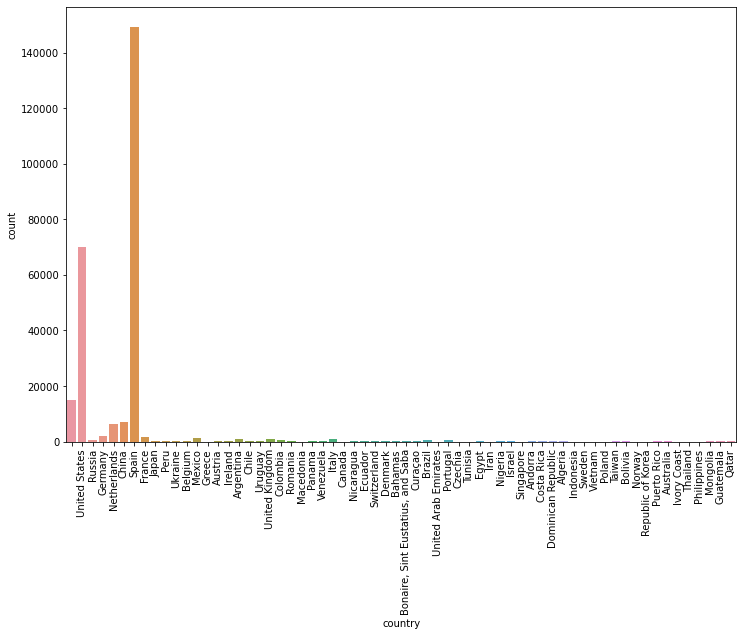

In [49]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot( x = logs_norm['country'], ax = ax)
ax = plt.xticks(rotation = 90)

### User-agent

(https://github.com/selwin/python-user-agents)


In [50]:
pip install pyyaml ua-parser user-agents

Note: you may need to restart the kernel to use updated packages.


In [51]:
from user_agents import parse

In [52]:
logs_norm['browser'] = logs_norm['user-agent'].map(lambda x : parse(x).browser.family)
logs_norm['os'] = logs_norm['user-agent'].map(lambda x : parse(x).os.family)
logs_norm['device'] = logs_norm['user-agent'].map(lambda x : parse(x).device.family)
logs_norm

,sitio_web,IP,time,method,resource,protocol,status,size,user-agent,lon,lat,country,browser,os,device
0,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other
1,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other
2,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other
3,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other
4,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39,GET,NaN,HTTP/1.1,200,7528,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,37.6068,55.7386,Russia,YandexBot,Other,Spider
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52,HEAD,NaN,HTTP/1.1,200,NaN,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,-96.8217,32.7787,United States,UptimeRobot,Other,Spider
261870,localhost,127.0.0.1,2014-03-02 03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other
261871,localhost,127.0.0.1,2014-03-02 03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other


In [53]:
logs_norm['browser'].unique()

array(['Other', 'Googlebot', 'YandexBot', 'bingbot', 'Firefox',
       'AhrefsBot', 'Baiduspider', 'UptimeRobot', 'msnbot-media',
       'BingPreview', 'Wget', 'ia_archiver', 'spbot', 'Opera', 'IE',
       'Chrome', 'Googlebot-Mobile', 'Mobile Safari', 'Googlebot-Image',
       'MJ12bot', 'Android', 'Google', 'Sogou web spider', 'YandexImages',
       'Chrome Mobile', 'FacebookBot', 'Java', 'msnbot', 'Thunderbird',
       'Baiduspider-image', 'BLEXBot', 'BlackBerry WebKit', 'curl',
       'favicon', 'EasouSpider', 'MobileSafari', 'Chrome Mobile iOS',
       'Mobile Safari UI/WKWebView', 'Safari', 'CareerBot',
       'Firefox Mobile', 'URLAppendBot', 'Exabot', 'socialbm_bot',
       'Chrome Frame', 'Mercury', 'GmailImageProxy', 'Genieo',
       'Chrome Mobile WebView', 'Maxthon', 'Outlook', 'SISTRIX Crawler',
       'Crawler', 'Chromium', 'UC Browser', 'archive.org_bot',
       'Opera Mini', 'AdsBot-Google', 'Xenu Link Sleuth', 'SeznamBot',
       'IE Mobile', 'Twitterbot', 'Yahoo! Slur

In [54]:
# Porcentaje de información que puede faltar en 'browser'
len(logs_norm[logs_norm['browser']=='Other'])/len(logs_norm['browser'])*100

6.0367183412201

In [55]:
logs_norm['os'].unique()

array(['Other', 'Linux', 'Windows', 'iOS', 'Mac OS X', 'Android',
       'BlackBerry OS', 'Ubuntu', 'Fedora', 'Windows Phone', 'Red Hat'],
      dtype=object)

In [56]:
# Porcentaje de información que falta en 'os'
len(logs_norm[logs_norm['os']=='Other'])/len(logs_norm['browser'])*100

36.722542403305944

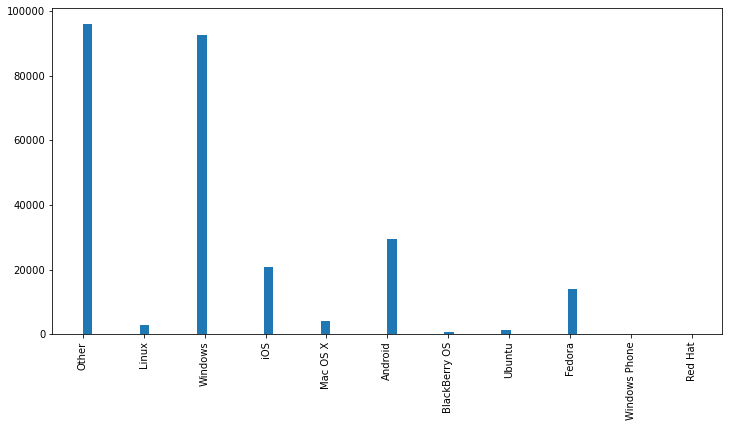

In [57]:
plt.figure(figsize = (12,6))

plt.hist(logs_norm['os'],bins = logs_norm['country'].nunique())
plt.xticks(rotation = 90)
plt.show()


In [58]:
logs_norm['device'].unique()

array(['Other', 'Spider', 'Mac', 'iPhone', 'Samsung GT-N7100', 'iPad',
       'SonyEricssonST25i', 'C2105', 'Asus ME172V', 'Samsung GT-I8190',
       'Samsung GT-I9100', 'C6903', 'Samsung GT-S5830',
       'Samsung GT-S5570-ORANGE/S5570BVKT1', 'Samsung SM-N9005', 'N7100',
       'SonyEricssonLT22i-o', 'BlackBerry 9300', 'R-001', 'LG-E610',
       'Alcatel Vodafone Smart II', 'Huawei Orange Daytona',
       'Samsung GT-I9300', 'Primux_Omega', 'LT22i', 'Samsung SM-T210',
       'Samsung GT-I9505', 'iOS-Device', 'Samsung GT-P5110',
       'SonyEricssonMT11i-o', 'bq Curie', 'E75', 'Samsung GT-P5200',
       'Samsung GT-S5570I', 'HTC Desire 601-orange-LS', 'C6603',
       'Samsung SPH-D710', 'HUAWEI P6-U06-orange', 'Generic Tablet',
       'HUAWEI G510-0100', 'Samsung GT-I9001-ORANGE/I9001BVKPA', 'XT910',
       'LG-E460-Orange', 'Samsung GT-S7275R',
       'Samsung GT-I9300-ORANGE/I9300BVALF4', 'LG-E975', 'LG-P700',
       'PrimuxCiclon2', 'Sony LT26i', 'Samsung GT-I9001',
       'Samsung 

In [59]:
# Porcentaje de información que falta en 'device'
len(logs_norm[logs_norm['device']=='Other'])/len(logs_norm['browser'])*100

47.43441380126876

Vemos que en los casos en los que falta la información correspondiente a buscador, sistema operativo o aparato, devuelve 'Other'.
La información sobre el navegador sí puede ser útil, ya que solo puede falta hasta un 6% de los datos. En sistema operativo y aparato es basante más elevado.

In [60]:
logs_clean = logs_norm
logs_clean.to_csv('logs_clean.csv')

## Ejercicio 4

### Geolocalización en mapa

In [61]:
logs_byIP = logs_clean[logs_clean['lon'] != ' '][['IP', 'lon', 'lat']].astype({'lon': float, 'lat': float})
logs_byIP = (logs_byIP[['IP', 'lon', 'lat']].groupby('IP')
              .agg({'lon' : np.mean, 'lat': np.mean, 'IP' : 'count'})
              .rename(columns = {'IP': 'numero'})           
              .astype({'numero': float})
                       
            )
logs_byIP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918 entries, 101.199.108.59 to 98.244.10.248
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     2918 non-null   float64
 1   lat     2918 non-null   float64
 2   numero  2918 non-null   float64
dtypes: float64(3)
memory usage: 91.2+ KB


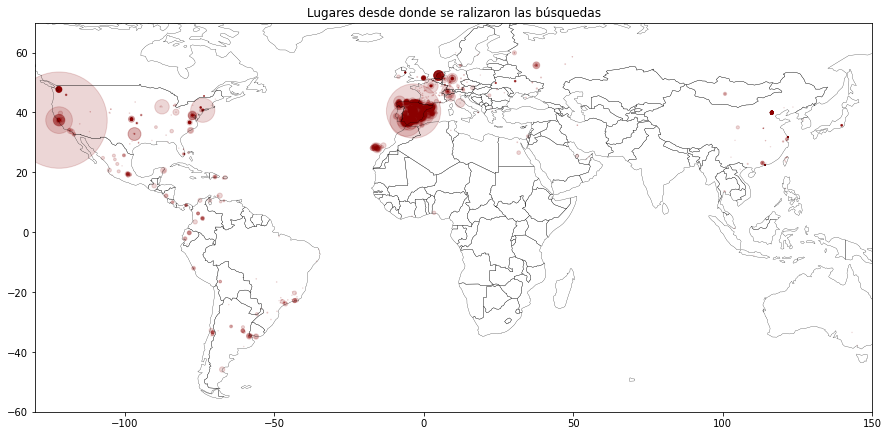

In [62]:
fig, ax = plt.subplots (figsize = (15,8))

plt.scatter(x = logs_byIP['lon'],
            y = logs_byIP['lat'],
            s = logs_byIP['numero']*2/10,
            alpha = 0.16,
            c = 'darkred')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax = ax, figsize=(20,5), linewidth=0.25, edgecolor='black', color='black')

plt.ylim((-60,70))
plt.xlim((-130,150))

plt.title('Lugares desde donde se ralizaron las búsquedas')

plt.show()

El tamaño de los puntos representa el número de logs que ha realizado esa dirección IP.
En la zona de Europa y especialmente España, no se ve nada claro. Seleccionando esta zona:

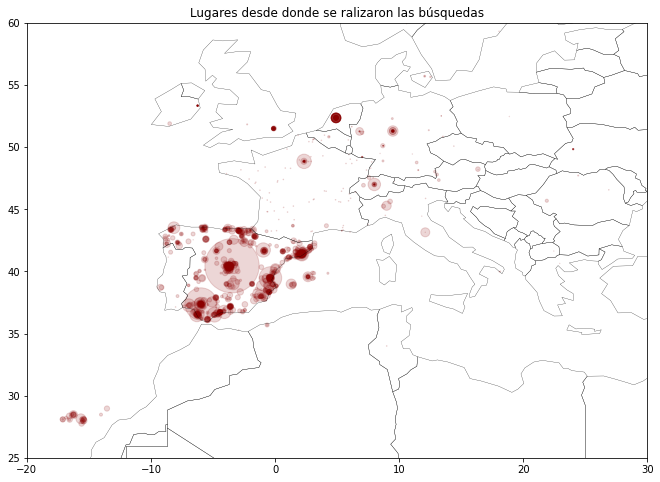

In [63]:
fig, ax = plt.subplots (figsize = (15,8))

plt.scatter(x = logs_byIP['lon'],
            y = logs_byIP['lat'],
            s = logs_byIP['numero']*2/10,
           alpha = 0.16,
           c = 'darkred')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax = ax, figsize=(20,5), linewidth=0.25, edgecolor='black', color='black')

plt.ylim((25,60))
plt.xlim((-20,30))

plt.title('Lugares desde donde se ralizaron las búsquedas')

plt.show()

Como ya habíamos comprobado en el histograma, España es el país donde más logs se realizaron, seguido de EEUU.

### Variables temporales

In [64]:
logs_clean['weekday'] = logs_clean['time'].dt.weekday.map({0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'})
logs_clean['month'] = logs_clean['time'].dt.month
logs_clean['monthday'] = logs_clean['time'].dt.day
logs_clean['yearday'] = logs_clean['time'].dt.dayofyear
logs_clean['hour'] = logs_clean['time'].dt.hour

logs_clean

,sitio_web,IP,time,method,resource,protocol,status,size,user-agent,lon,lat,country,browser,os,device,weekday,month,monthday,yearday,hour
0,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other,Saturday,2,23,54,3
1,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other,Saturday,2,23,54,3
2,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other,Saturday,2,23,54,3
3,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other,Saturday,2,23,54,3
4,localhost,127.0.0.1,2014-02-23 03:10:31,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other,Saturday,2,23,54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39,GET,NaN,HTTP/1.1,200,7528,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,37.6068,55.7386,Russia,YandexBot,Other,Spider,Saturday,3,2,61,3
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52,HEAD,NaN,HTTP/1.1,200,NaN,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,-96.8217,32.7787,United States,UptimeRobot,Other,Spider,Saturday,3,2,61,3
261870,localhost,127.0.0.1,2014-03-02 03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other,Saturday,3,2,61,3
261871,localhost,127.0.0.1,2014-03-02 03:10:18,OPTIONS,NaN,HTTP/1.0,200,NaN,Apache (internal dummy connection),,,,Other,Other,Other,Saturday,3,2,61,3


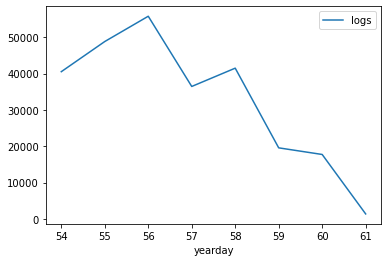

In [65]:
data = logs_clean[['yearday','method']].groupby('yearday').count().rename(columns = {'method' : 'logs'})
ax = sns.lineplot(data = data)

Número de lgos por día. Aunque son pocos días, podemos ver que entre 54 y 58 hay un pico, que después va bajando hasta el día 61.

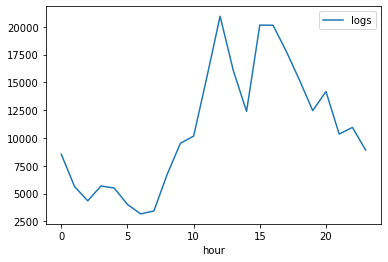

In [66]:
data = logs_clean[['hour','method']].groupby('hour').count().rename(columns = {'method' : 'logs'})
ax = sns.lineplot(data = data)

En este gráfico vemos el comportamiento que parece normal para el comportamiento de la población en España en general (que es donde más logs se producen). Vemos un pico por la mañana, un valle a la hora de la comida, otro pico por la tarde y una gran disminución por la noche.
El pico que se produce en torno a las 3-4 de la mañana podría deberse a que es de día en EEUU, segundo país donde más logs se producen.

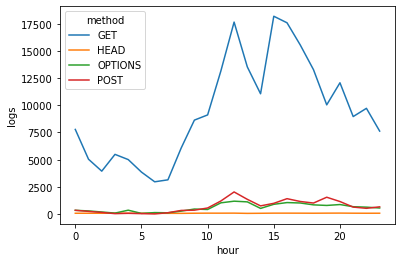

In [67]:
data = (logs_clean[['method', 'hour', 'month']]
     .groupby(['method', 'hour'])
     .count()   
     .reset_index()
     .rename(columns = {'month':'logs'})
)
ax = sns.lineplot(data = data, x = 'hour', y = 'logs', hue = 'method')

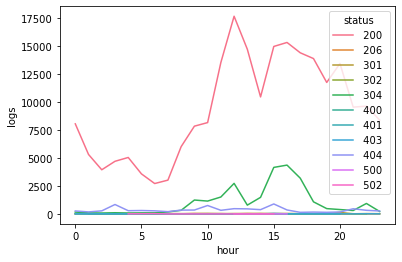

In [68]:
data = (logs_clean[['status', 'hour', 'month']]
     .groupby(['status', 'hour'])
     .count()   
     .reset_index()
     .rename(columns = {'month':'logs'})
)
ax = sns.lineplot(data = data, x = 'hour', y = 'logs', hue = 'status')

In [69]:
data_selection = logs_clean[['browser','month']].groupby(['browser']).count().reset_index().sort_values('month', ascending = False).head(7)
data_selection

,browser,month
33,Googlebot,51739
13,Chrome,39993
25,Firefox,34770
37,IE,33414
4,Android,22012
46,Mobile Safari,18213
55,Other,15806


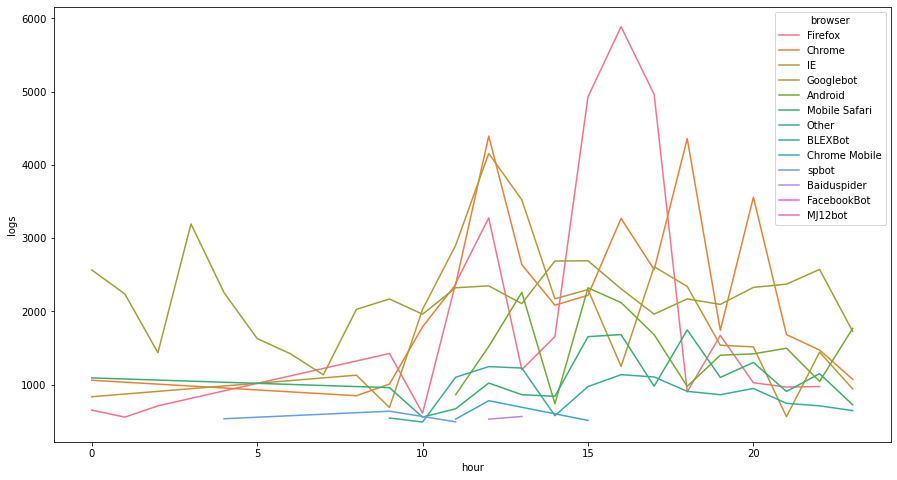

In [80]:
data = (logs_clean[['browser', 'hour', 'month']]
     .groupby(['browser', 'hour'])
     .count()   
     .reset_index()
     .rename(columns = {'month':'logs'})
     .sort_values('logs', ascending = False)
     .head(130)
)

ax = plt.subplots (figsize = (15,8))
ax = sns.lineplot(data = data, x = 'hour', y = 'logs', hue = 'browser')

En el gráfico anterior se ha impuesto un corte (los 130 mayores) para que no salgan demasiados buscadores emborronando el gráfico